# Introduction to Neural Networks

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

![dense](img/dogcat.gif)

## Agenda

SWBAT:

- describe the basic structure of densely connected neural networks;
- describe the various activation functions that are used in neural networks;
- describe the concept of backpropagation;
- explain the use of gradient descent in neural networks.

## Background

Neural networks have been around for a while. They are over 70 years old, dating back to  their proposal in 1944 by Warren McCullough and Walter Pitts. These first proposed neural nets had thresholds and weights, but no layers and no specific training mechanisms.

The "perceptron", the first trainable neural network, was created by Frank Rosenblatt in 1957. It consisted of a single layer with adjustable weights in the middle of input and output layers.

![peceptron](img/nn-diagram.png)

## Relation to Previous Models

### Logistic Regression

Recall logistic regression:

Think of the weights as the betas and the activation function as the sigmoid function!

### Stacking Ensembles

Recall model stacking:

Various base models' predictions are fed into a "meta-estimator" that is trained to aggregate them optimally. This is analogous to the multiple **layers** of a neural network.

## Basic Architecture

For our DS purposes, we'll generally imagine our network to consist of only a few layers, including an input layer (where we feed in our data) an output layer (comprising our predictions). Significantly, there will also (generally) be one or more layers of neurons between input and output, called **hidden layers**.

One reason these are named hidden layers is that what their output actually represents in not really known.  The activation of node 1 of the first hidden layer may represent a sequence of pixel intensity corresponding to a horizontal line, or a group of dark pixels in the middle of a number's loop. 

![dense](img/Deeper_network.jpg)

Because we are unaware of how exactly these hidden layers are operating, neural networks are considered **black box** algorithms.  You will not be able to gain much inferential insight from a neural net.

Each of our pixels from our digit representation goes to each of our nodes, and each node has a set of weights and a bias term associated with it.

## Inspiration from Actual Neurons

The composition of neural networks can be **loosely** compared to a neuron.
![neuron](img/neuron.png)

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very **densely**.

This is a loose analogy, but can be a helpful **mnemonic**. The inputs to our node are like inputs to our neurons. They are either direct sensory information (our features) or input from other axons (nodes passing information to other nodes). The body of our neuron (soma) is where the signals of the dendrites are summed together, which is loosely analogous to our **collector function**. If the summed signal is large enough (our **activation function**), they trigger an action potential which travels down the axon to be passed as output to other dendrites. See [here](https://en.wikipedia.org/wiki/Neuron) for more. 

## Forward Propagation

Let's first look at **forward propagation** on the level of the perceptron.

We will use the built-in dataset of handwritten numbers from `sklearn`, which comes from the UCI Machine Learning collection [digits source](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Each record is a 64-bit (8x8) image of a handwritten number between 0 and 9. Each pixel value (a number between 0 and 16) represents the relative brightness of the pixel. 

In [2]:
digits = load_digits()
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)
eight_by_eight_image = digits.images[0]

It is similar to the famous [**MNIST**](http://yann.lecun.com/exdb/mnist/index.html) dataset which is sometimes referred to the ["hello world" of computer vision](https://www.kaggle.com/c/digit-recognizer).  

Let's look at one digit:

In [3]:
digits = load_digits()
eight_by_eight_image = digits.images[0]

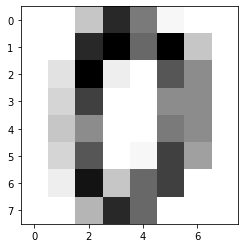

In [4]:
imgplot = plt.imshow(eight_by_eight_image, cmap='Greys')

In [5]:
# look at the matrix below and make sure you see how the large numbers 
# correspond to darker shades in the image above

eight_by_eight_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

When passing the data into our perceptron, we will **flatten** the image into a 64x1 array.

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
digits.data[0].shape

(64,)

In [7]:
digits.data[0].shape[0]

64

In [8]:
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)

In [9]:
flat_image.shape

(64, 1)

### Weights

Our weights vector will have the same number of weights as pixels.

![weights](img/log-reg-nn-ex-w.png)

We will instantiate our weight with small random numbers.


In [12]:
w = np.random.uniform(-.1, .1, (flat_image.shape[0], 1))
w[:5]

array([[-0.05645994],
       [ 0.09320994],
       [-0.05847486],
       [ 0.090149  ],
       [-0.0285587 ]])

In [13]:
w.shape

(64, 1)

We'll set our bias term to 0:

In [14]:
b = 0

### Summation

![sum](img/log-reg-nn-ex-sum.png)

Our inputs, the pixels, each are multiplied by their respective weights and then summed together with the bias. 

This amounts to the dotproduct of the pixel value and the weights.

In [15]:
z = flat_image.T.dot(w) + b
z

array([[0.01784838]])

### Activation

![activation](img/log-reg-nn-ex-a.png)

Then we pass it into an activation function. The activation function converts our summed inputs into an output, which is then passed on to other nodes in hidden layers, or as an end product in the output layer. This can loosely be thought of as the action potential traveling down the axon.

When we build our models in `keras`, we will specify the activation function of both hidden layers and output.

We have a suite of activation functions to choose from.

#### Sigmoid

$f(x) = \frac{1}{1+e^{-x}}$

In [16]:
# Z is the input from our collector, the sum of the weights
# multiplied by the features and the bias

def sigmoid(z):
    '''
    Input the sum of our weights times the pixel intensities, plus the bias
    Output a number between 0 and 1.
    
    '''
    return 1/(1+np.exp(-z))

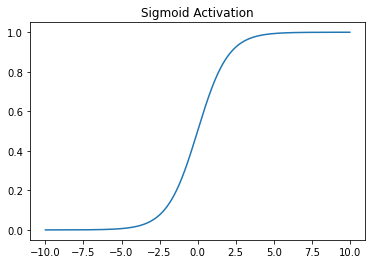

In [17]:
X = np.linspace(-10, 10, 20000)
sig = sigmoid(X)

fig, ax = plt.subplots()
ax.plot(X, sig)
ax.set_title('Sigmoid Activation');

#### tanh

$f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

The hyperbolic tangent function is a shifted version of the sigmoid. The inflection point passes through 0,0 instead of 0,.5, and the output is between -1 and 1.  This means the mean of the output is centered around 0, which can make learning in the next layer easier. tanh is almost always better in a **hidden layer** than sigmoid because it [speeds up learning](https://stats.stackexchange.com/questions/330559/why-is-tanh-almost-always-better-than-sigmoid-as-an-activation-function). For the output layer, however, sigmoid makes sense for binary outcomes.

In [18]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

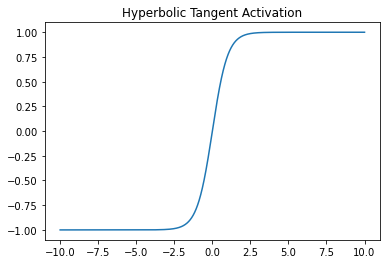

In [19]:
# Coding tanh:

X = np.linspace(-10, 10, 20000)
y_tanh = tanh(X)

fig, ax = plt.subplots()
ax.plot(X, y_tanh)
ax.set_title('Hyperbolic Tangent Activation');

One problem with tanh (and sigmoid) is that if our input is large, the slope of the activation function flattens out.  When conducting backpropagation, we will use the derivative of the activation function as one of our terms multiplied by a learning rate to determine how big a step to take when adjusting our weights. If our derivative is close to zero, the step will be very small, so the speed of our learning will be very slow.  This is called the **vanishing gradient** problem.

#### ReLU

$f(x) = 0$ if $x\leq 0$; $f(x) = x$ otherwise

ReLU is a commonly used and effective activation function because of speed.  Given that the **output** is zero when negative, some nodes become inactive (i.e. produce an output of 0).  Zero outputs take little computational power. Also, the constant gradient leads to faster learning in comparison to sigmoid and tanh, which come close to 0 with large positive and large negative values. Since the speed of our network is linked to the derivative, a derivative close to zero will result in slow learning.

See also [this page on stackexchange](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks).

In [20]:
def relu(z, leaky=False, a=0.01):
    if z > 0:
        return z
    elif leaky == False:
        return 0
    else:
        return a*z

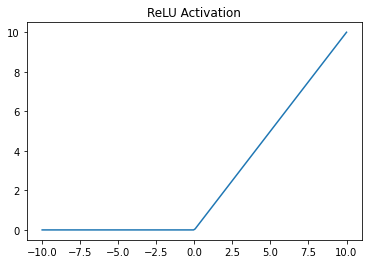

In [21]:
# Coding ReLU:

X = np.linspace(-10, 10, 200)

y_relu = [relu(x) for x in X]

fig, ax = plt.subplots()
ax.plot(X, y_relu)
ax.set_title('ReLU Activation');

In [28]:
def relu_l(z, leaky=True, a=0.25):
    if z > 0:
        return z
    elif leaky == False:
        return 0
    else:
        return a*z

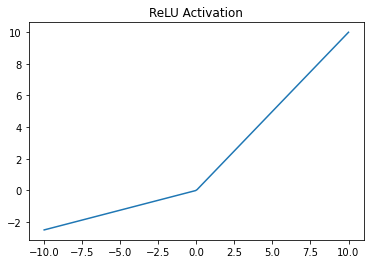

In [29]:
# Coding ReLU:

X = np.linspace(-10, 10, 200)

y_relu_l = [relu_l(x) for x in X]

fig, ax = plt.subplots()
ax.plot(X, y_relu_l)
ax.set_title('ReLU Activation');

#### Swish

$f(x) = \frac{x}{1+e^{-x}}$

New on the scene, this function has lots of promise since it looks much like ReLU but has a nonzero derivative everywhere. See [here](https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820) for more.

In [26]:
def swish(z):
    return z/(1+np.exp(-z))

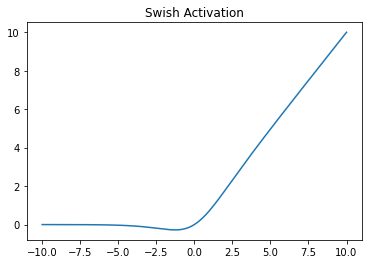

In [27]:
# Coding Swish

X = np.linspace(-10, 10, 200)

y_swish = [swish(x) for x in X]

fig, ax = plt.subplots()
ax.plot(X, y_swish)
ax.set_title('Swish Activation');

#### Softmax

$\large f(x_0) = \frac{e^{x_0}}{\Sigma_{x\epsilon X}e^x}$

Because this function relates each value to the sum of all values, this is the appropriate activation in the output layer for **multi-class** classification problems. We can interpret the function as outputting the probabilities of belonging to each class.

There are other activation functions; [see here](https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a). 

Our nodes will be taking in input from multiple sources. Let's add the entire training set as our input. 


In [30]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    random_state=42,
                                                    test_size=0.2)
X_train.shape

(1437, 64)

In [31]:
X_train[0, :].reshape(8, 8)

array([[ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 12., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 16.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 16.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  6., 16.,  2.,  5.,  2.,  0.,  0.],
       [ 0.,  4., 16.,  2., 12., 15.,  2.,  0.],
       [ 0.,  1., 14., 13.,  2., 13., 11.,  0.],
       [ 0.,  0.,  3., 11., 16., 13.,  4.,  0.]])

In [32]:
z_0 = X_train.dot(w)+b
z_0.shape

(1437, 1)

In [33]:
a_0 = sigmoid(z_0)
a_0

array([[0.60003988],
       [0.39090779],
       [0.31311637],
       ...,
       [0.17975964],
       [0.19198112],
       [0.31949072]])

In [34]:
a_0_relu = [relu(z) for z in z_0]
a_0_relu[:10]

[array([0.40563127]), 0, 0, 0, 0, 0, 0, array([0.23806961]), 0, 0]

In [35]:
w_1 = np.random.normal(0, 0.1, (X_train.shape[1], 4))
w_1.shape

(64, 4)

In [36]:
b_1 = 0

In [37]:
z_1 = X_train.dot(w_1) + b_1
z_1

array([[ -8.81966284,   0.7034747 ,   4.97648875,  -8.37782305],
       [-10.55435987,   3.63254777,   1.49374767,  -1.43445144],
       [-13.36472445,   1.20392166,   8.36807819,  -1.10621367],
       ...,
       [ -9.59016834,   1.23598596,  -4.33995333,  -3.6610777 ],
       [ -8.3231921 ,   2.15393418,   1.23634665,   3.79224386],
       [ -9.44340295,  -3.18345955,   2.7582876 ,  -5.29021054]])

In [38]:
a_1 = sigmoid(z_1)
a_1

array([[1.47776343e-04, 6.68957706e-01, 9.93149018e-01, 2.29857056e-04],
       [2.60788492e-05, 9.74232796e-01, 8.16640111e-01, 1.92406046e-01],
       [1.56954308e-06, 7.69221691e-01, 9.99767893e-01, 2.48577450e-01],
       ...,
       [6.83932283e-05, 7.74864540e-01, 1.28693571e-02, 2.50606176e-02],
       [2.42760576e-04, 8.96035839e-01, 7.74927456e-01, 9.77952111e-01],
       [7.92041267e-05, 3.97929359e-02, 9.40379699e-01, 5.01541769e-03]])

Now each of these neurons has a set of weights and a bias associated with it.

In [39]:
w_1 = np.random.normal(0, 0.1, (a_1.shape[1], 1))

w_1.shape

(4, 1)

In [40]:
b_1 = 0

In [41]:
z_1 = a_1.dot(w_1)

In [42]:
output = sigmoid(z_1)
y_pred = output > .5
y_hat = y_pred.astype(int)
y_hat[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])